# Color detection and distributions in carpet

In this notebook, I have used machine learning algorithm, KMeans, to extract colors from carpet images. I will use OpenCV2 for image manipulation, apply KMeans to identify the major colors and then plot the information using altair library of Python.

## 1. Trying out on one image, learning experience 

We import the basic libraries including matplotlib.pyplot and numpy. To extract the count, we will use Counter from the collections library. To use OpenCV, we will use cv2. KMeans algorithm is part of the sklearn's cluster subpackage. To compare colors we first convert them to lab using rgb2lab and then calculate similarity using deltaE_cie76. Finally, to combine paths while reading files from a directory, we import os.

In [1]:
#importing all the necessary libraries 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

# Sample carpet image reading 
## Working with OpenCV


The type of this input is <class 'numpy.ndarray'>
Shape: (1200, 752, 3)


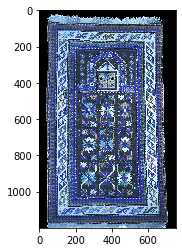

In [146]:
image = cv2.imread('sample_carpet.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)


We see that the image has different colors as compared to the original image. This is because by default OpenCV reads the images in the color order BLUE GREEN RED i.e. BGR. Thus, we need to convert it into REG GREEN BLUE i.e. RGB.

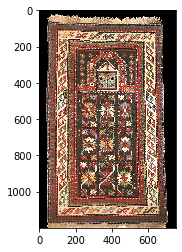

In [147]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

The image can also be converted to grayscale if needed.



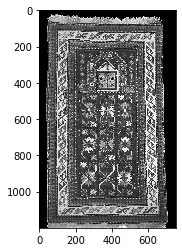

In [4]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

We might want to resize the image to a certain size whenever the images are huge or when we are working with multiple images of different dimensions.



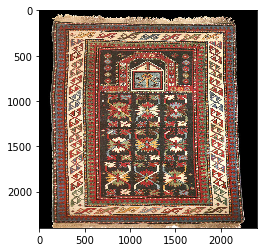

In [20]:
resized_image = cv2.resize(image, (1200, 1200))
plt.imshow(resized_image)

## Color Identification


Not that we know a bit about OpenCV, let's start identifying colors from an image.

First, we will define a function that can give us the hex values of our the colors that we will identify.

In [10]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

KMeans expects flattened array as input during its fit method. Thus, we need to reshape the image using numpy. Then, we can apply KMeans to first fit and then predict on the image to get the results. Then, the cluster colors are identified an arranged in the correct order. We plot the colors as a pie chart.



I have combined all the steps in two method.



In [11]:
def get_image(image_path):
    #iterate through the folldeer, grab each pic, process and return it
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [38]:
modified_image = cv2.resize(get_image('sample_carpet.jpg'), (400, 250), interpolation = cv2.INTER_AREA)
modified_image_2 = cv2.resize(get_image('sample_carpet_2.jpg'), (400, 250), interpolation = cv2.INTER_AREA)
modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
modified_image_2 =modified_image_2.reshape(modified_image_2.shape[0]*modified_image_2.shape[1], 3)
np.append(modified_image,modified_image_2)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [26]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (400, 250), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i]/255 for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]*255) for i in counts.keys()]
    rgb_colors = [ordered_colors[i]*255 for i in counts.keys()]
    
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = ordered_colors)
    
    return rgb_colors

[array([180.10051576, 153.43277937, 122.39002865]),
 array([127.60243827,  65.86103936,  51.27234218]),
 array([103.61734639,  91.92607339,  76.80867319]),
 array([164.79667722, 111.53560127,  84.23306962]),
 array([174.95541581,  63.61920405,  53.34165572]),
 array([245.55759016, 229.18912497, 196.62706178]),
 array([70.58251203, 57.9928948 , 46.86465735]),
 array([0.38966381, 0.37070815, 0.37535765]),
 array([125.0883709 , 120.31518955, 105.43417008]),
 array([216.19188793, 188.29320736, 155.12819677])]

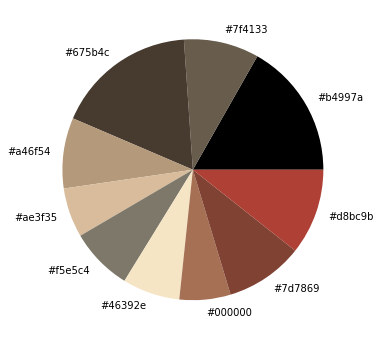

In [32]:
get_colors(get_image('sample_carpet.jpg'), 10, True)


[array([85.63438786, 67.04861111, 68.59580761]),
 array([153.11537916, 119.37278526,  57.97221828]),
 array([231.49203584, 212.506222  , 174.31060229]),
 array([158.95479352, 126.79852647, 100.13971257]),
 array([132.90332907,  88.69287627,  74.24287045]),
 array([68.90090256, 42.31442255, 25.93958372]),
 array([1.14129501, 0.79746934, 0.71623838]),
 array([110.37224421,  69.79013567,  43.40057942]),
 array([195.14984292, 166.79483677, 131.40144789]),
 array([196.75436807, 160.66407346,  76.78217064])]

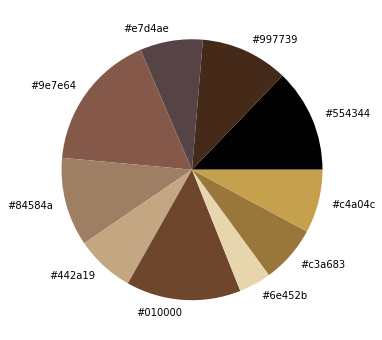

In [31]:
get_colors(get_image('sample_carpet_2.jpg'), 10, True)



# Creating the image / region dataset


To simplify the data manipulation, I will create a dataset of all image names and their corresponding region. I am dividing them by main regions as I want to find predominant colors of each region.

In [3]:
# Importing the necessary libraries

import os
import pandas as pd

# a placeholder to add all image names and associated folder name  
data = []

carpetdir = 'azerbaijani_carpets/'

for root, dirc, files in os.walk(carpetdir):
    for file in files:
        if ".jpg" in file:
            data.append((os.path.join(file), root.split('/')[-1]))

carpets_df = pd.DataFrame(data, columns = ['File_Name','Carpet_Region'])


In [4]:
carpets_df.head()

,File_Name,Carpet_Region
0,antique-shirvan-pictorial-rug11b-Romanoff.jpg,Shirvan
1,antique_shirvan_kilim130_caucasian.jpg,Shirvan
2,antique_shirvan_star_rug16c.jpg,Shirvan
3,antique_shirvan_marasali_boteh_prayer_rug14.jpg,Shirvan
4,antique_shirvan_kilim70_caucasian.jpg,Shirvan


## Number of images in each region's folder.


In [23]:
carpets_df.groupby('Carpet_Region').count()

,File_Name
Carpet_Region,
Baku,54
Ganja,62
Guba,2316
Karabagh,351
Nakhchivan,34
Qazax,1009
Shirvan,890


## Basic statistics about our dataset

In [6]:
carpets_df.groupby('Carpet_Region').count().describe()


,File_Name
count,7.000000
mean,673.714286
std,829.449358
min,34.000000
25%,58.000000
50%,351.000000
75%,949.500000
max,2316.000000


# Create images sample for each region


In [73]:
def sample_data(info, sample_size=50, groupby='Carpet_Region'):
    '''
    Sampling procedure
    ''' 
    def sample_func(x):
        if sample_size < 1: 
            subsample_size = round(0.1*len(x))
        else:
            subsample_size = len(x) if len(x) < sample_size else sample_size
        return list(x.sample(subsample_size, random_state=1))
    
    sample = info.groupby(groupby).agg({
        'File_Name': sample_func
    }).to_dict()
    
    return sample['File_Name']

In [74]:
# Picking different sampling sizes to experiment  
sample_carpets_50 = sample_data(carpets_df, sample_size=50, groupby='Carpet_Region')
sample_carpets_34 = sample_data(carpets_df, sample_size=34, groupby='Carpet_Region')
sample_carpets_10 = sample_data(carpets_df, sample_size=0.1, groupby='Carpet_Region')
sample_carpets_all = sample_data(carpets_df, sample_size=2316, groupby='Carpet_Region')



In [35]:
carpets_df.groupby('Carpet_Region').count()

,File_Name
Carpet_Region,
Baku,54
Ganja,62
Guba,2316
Karabagh,351
Nakhchivan,34
Qazax,1009
Shirvan,890


# Detect 10 prevalent colors in samples & create visualization data

In [9]:
import numpy as np
import pandas as pd
from zipfile import ZipFile
import re
import cv2
from sklearn.cluster import KMeans, MiniBatchKMeans
from math import sqrt
from collections import Counter

In [10]:
import glob
from PIL import Image

# LOAD AND RESIZE IMAGE
def load_img(filename):
    for file in glob.glob('azerbaijani_carpets/**/*.jpg'): 
        if filename == file.split('/')[-1]:
            image = cv2.imread(file)
            try:
                img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            except cv2.error as e:
                print('Failed to load:', filename)
                return None
    return img

def resize_img(img):
    h, w, _ = img.shape
    w_new = int(200 * w / max(w, h))
    h_new = int(200 * h / max(w, h))
    
    return cv2.resize(img, (w_new, h_new), interpolation = cv2.INTER_AREA)

In [11]:
# COLORS CONVERSION
def rgb_to_hex(rgb):
    return "#{:02x}{:02x}{:02x}".format(int(rgb[0]), int(rgb[1]), int(rgb[2]))

def rgb_to_hsp(rgb):
    """
    Calculates RGB color brightness
    """
    return sqrt(0.299 * (rgb[0]**2) + 0.587 * (rgb[1]**2) + 0.114 * (rgb[2]**2))

In [116]:
# PREVALENT COLORS DETECTION WITH K-Means
def detect_prevalent_colors(files, group_label, colors_num):
    """
    Detect N-most prevalent colors in the list of given image files
    
    Params:
    files: list of filenames
    group_label: label of group as tuple of variable and string
    colors_num: N most prevalent colors to detect 
    """
    data = []
    for f in files:
        img = load_img(f)
        if img is not None:
            mod_img = resize_img(img)
            mod_img = mod_img.reshape(mod_img.shape[0] * mod_img.shape[1], 3).astype('float32')
            data.append(mod_img)
        
    data = np.concatenate(data, axis=0)
    
    clustering_method = MiniBatchKMeans # KMeans or MiniBatchKMeans
    
    clf = clustering_method(n_clusters = colors_num)
    labels = clf.fit_predict(data)
    cluster_centers = clf.cluster_centers_
    
    counts = Counter(labels)
    counts_sum = sum(counts.values())
    
    colors_data = [
        {
            'hex': rgb_to_hex( cluster_centers[i]),
            'hsp': rgb_to_hsp(cluster_centers[i]),
            'prop': (counts[i] / counts_sum),
            group_label[0]: group_label[1]
        } for i in counts.keys()
    ]
    
    return colors_data

### Sample size is 50 

In [47]:
# RUN
viz_colors_50 = []
for region, files in sample_carpets_50.items():
    print('Processing region:', region)
    
    region_colors = detect_prevalent_colors(files, ('region', region), colors_num=10)
    
    # Sort colors by brightness
    viz_colors_50.extend(
        sorted(region_colors, key=lambda x: x['hsp'])
    )

Processing region: Baku
Processing region: Ganja
Processing region: Guba
Processing region: Karabagh
Processing region: Nakhchivan
Processing region: Qazax
Processing region: Shirvan


###  Sample size is 34 (the number of images in the smallest group)

In [46]:
# RUN
viz_colors_34 = []
for region, files in sample_carpets_34.items():
    print('Processing region:', region)
    
    region_colors = detect_prevalent_colors(files, ('region', region), colors_num=10)
    
    # Sort colors by brightness
    viz_colors_34.extend(
        sorted(region_colors, key=lambda x: x['hsp'])
    )

Processing region: Baku
Processing region: Ganja
Processing region: Guba
Processing region: Karabagh
Processing region: Nakhchivan
Processing region: Qazax
Processing region: Shirvan


###  Sample size is 10% of the given region


In [45]:
# RUN
viz_colors_10 = []
for region, files in sample_carpets_10.items():
    print('Processing region:', region)
    
    region_colors = detect_prevalent_colors(files, ('region', region), colors_num=10)
    
    # Sort colors by brightness
    viz_colors_10.extend(
        sorted(region_colors, key=lambda x: x['hsp'])
    )

Processing region: Baku
Processing region: Ganja
Processing region: Guba
Processing region: Karabagh
Processing region: Nakhchivan
Processing region: Qazax
Processing region: Shirvan


###  Sample size is all images in the given region



In [90]:
# RUN
viz_colors_all = []
for region, files in sample_carpets_all.items():
    print('Processing region:', region)
    
    region_colors = detect_prevalent_colors(files, ('region', region), colors_num=10)
    
    # Sort colors by brightness
    viz_colors_all.extend(
        sorted(region_colors, key=lambda x: x['hsp'])
    )

Processing region: Baku
Processing region: Ganja
Processing region: Guba
Processing region: Karabagh
Processing region: Nakhchivan
Processing region: Qazax
Processing region: Shirvan


In [89]:
# RUN
viz_colors_all_15_clusters = []
for region, files in sample_carpets_all.items():
    print('Processing region:', region)
    
    region_colors = detect_prevalent_colors(files, ('region', region), colors_num=15)
    
    # Sort colors by brightness
    viz_colors_all_15_clusters.extend(
        sorted(region_colors, key=lambda x: x['hsp'])
    )

Processing region: Baku
Processing region: Ganja
Processing region: Guba
Processing region: Karabagh
Processing region: Nakhchivan
Processing region: Qazax
Processing region: Shirvan


In [117]:
# RUN
viz_colors_all_20_clusters = []
for region, files in sample_carpets_all.items():
    print('Processing region:', region)
    
    region_colors = detect_prevalent_colors(files, ('region', region), colors_num=20)
    
    # Sort colors by brightness
    viz_colors_all_20_clusters.extend(
        sorted(region_colors, key=lambda x: x['hsp'])
    )

Processing region: Baku
Processing region: Ganja
Processing region: Guba
Processing region: Karabagh
Processing region: Nakhchivan
Processing region: Qazax
Processing region: Shirvan


# Prepare & Plot colors timelines visualization

In [60]:
viz_df_50 = pd.DataFrame(viz_colors_50)
viz_df_50.head()

,hex,hsp,prop,region
0,#040303,3.653757,0.113315,Baku
1,#382929,46.797921,0.100392,Baku
2,#773226,76.981790,0.098642,Baku
3,#594d49,80.801601,0.116682,Baku
4,#895b44,105.105791,0.144677,Baku


In [51]:
viz_df_34 = pd.DataFrame(viz_colors_34)
viz_df_34.head()

,hex,hsp,prop,region
0,#040303,3.882450,0.114563,Baku
1,#34282a,44.465903,0.093983,Baku
2,#6c352b,73.427085,0.109475,Baku
3,#525155,82.592773,0.079750,Baku
4,#7f5746,99.542421,0.133454,Baku


In [53]:
viz_df_10 = pd.DataFrame(viz_colors_10)
viz_df_10.head()

,hex,hsp,prop,region
0,#060506,6.079749,0.121939,Baku
1,#42302c,54.104556,0.101399,Baku
2,#5e4e46,82.941198,0.118306,Baku
3,#863f27,88.975001,0.098813,Baku
4,#84644d,108.966951,0.124059,Baku


In [77]:
viz_df_all = pd.DataFrame(viz_colors_all)
viz_df_all.head()

,hex,hsp,prop,region
0,#030202,3.035419,0.114948,Baku
1,#372626,44.109903,0.092965,Baku
2,#56443f,73.895294,0.137866,Baku
3,#8d382a,89.852004,0.118627,Baku
4,#7c5f50,103.661896,0.159902,Baku


In [108]:
viz_df_all_15_clusters = pd.DataFrame(viz_colors_all_15_clusters)
viz_df_all_15_clusters.head()

,hex,hsp,prop,region
0,#010101,1.763775,0.107395,Baku
1,#271d1e,32.841362,0.050940,Baku
2,#3c393d,58.785197,0.060257,Baku
3,#5b2e23,62.278921,0.060211,Baku
4,#694a3d,83.744759,0.098398,Baku


In [120]:
viz_df_all_20_clusters = pd.DataFrame(viz_colors_all_20_clusters)
viz_df_all_20_clusters.head()

,hex,hsp,prop,region
0,#010101,1.237158,0.103090,Baku
1,#1f1615,25.370571,0.029819,Baku
2,#2c282f,42.787174,0.035790,Baku
3,#502a22,55.771851,0.049052,Baku
4,#404147,65.708922,0.043717,Baku


# Visualize with color proportions


As I hav used three different smapling sizes, I want to see how that affects the color distributions in the regions. So, I look initially only at Baku region which has 54 images to see if the distribution of colors differs greatly basd on the sample size.

In [97]:
import altair as alt

chart1 = alt.Chart(viz_df_50[:10], title='Prevalent colors in carpets by region, sample of 50 images').mark_bar(size=100).encode(
    alt.X(
        'region',
        axis=alt.Axis(
            title='Region of Azerbaijan'
        )
    ),
    alt.Y(
        'sum(prop)',
        scale=alt.Scale(domain=(0,1)),
        axis=alt.Axis(
            title='Prevalent color proportions'
        )
    ),
    
    color=alt.Color(
        'hex',
        scale=None,
        legend=None
    ),
    order=alt.Order(
        'hsp',
        sort='ascending'
    ),
    tooltip=['region', 'hex', 'prop']
).properties(
    width=100,
    height=500
)

chart2 = alt.Chart(viz_df_34[:10], title='Prevalent colors in carpets by region, sample of 34 images').mark_bar(size=100).encode(
    alt.X(
        'region',
        axis=alt.Axis(
            title='Region of Azerbaijan'
        )
    ),
    alt.Y(
        'sum(prop)',
        scale=alt.Scale(domain=(0,1)),
        axis=alt.Axis(
            title='Prevalent color proportions'
        )
    ),
    
    color=alt.Color(
        'hex',
        scale=None,
        legend=None
    ),
    order=alt.Order(
        'hsp',
        sort='ascending'
    ),
    tooltip=['region', 'hex', 'prop']
).properties(
    width=100,
    height=500
)

chart3 = alt.Chart(viz_df_10[:10], title='Prevalent colors in carpets by region, sample of 10% of images').mark_bar(size=100).encode(
    alt.X(
        'region',
        axis=alt.Axis(
            title='Region of Azerbaijan'
        )
    ),
    alt.Y(
        'sum(prop)',
        scale=alt.Scale(domain=(0,1)),
        axis=alt.Axis(
            title='Prevalent color proportions'
        )
    ),
    
    color=alt.Color(
        'hex',
        scale=None,
        legend=None
    ),
    order=alt.Order(
        'hsp',
        sort='ascending'
    ),
    tooltip=['region', 'hex', 'prop']
).properties(
    width=100,
    height=500
)

chart1 | chart2 | chart3


alt.HConcatChart(...)

## All regions with 50 images sampled 
As we can see, the color distributions varies based on the sampling size. As our regions have a great difference in the number of images, one of the suggeested methods would be to use 10%  of images of each region. However, our smallest rgion has only 34 images. So, its sample size would be 3 images while the biggest region's sample size would be 232 images, hence, more diverse pool of images to determine most prevelent colors. So, I have decided to use 50 images as sample size to showcase the distribution of the colors


In [96]:
import altair as alt

alt.Chart(viz_df_50, title='Prevalent colors in carpets by region').mark_bar(size=100).encode(
    alt.X(
        'region',
        axis=alt.Axis(
            title='Region of Azerbaijan'
        )
    ),
    alt.Y(
        'sum(prop)',
        scale=alt.Scale(domain=(0,1)),
        axis=alt.Axis(
            title='Prevalent color proportions'
        )
    ),
    
    color=alt.Color(
        'hex',
        scale=None,
        legend=None
    ),
    order=alt.Order(
        'hsp',
        sort='ascending'
    ),
    tooltip=['region', 'hex', 'prop']
).properties(
    width=900,
    height=500
)

alt.Chart(...)

# Color distribution based on the analysis of all images in each region

While tsking samples from each region can save as computing power, in this case, the overall pool of images is small enough to not sample the images. In this way, we will tradeoff a few seconds of computing time for more accurate color distribution between regions.

In [94]:
import altair as alt

alt.Chart(viz_df_all, title='Prevalent colors in carpets by region').mark_bar(size=100).encode(
    alt.X(
        'region',
        axis=alt.Axis(
            title='Region of Azerbaijan'
        )
    ),
    alt.Y(
        'sum(prop)',
        scale=alt.Scale(domain=(0,1)),
        axis=alt.Axis(
            title='Prevalent color proportions'
        )
    ),
    
    color=alt.Color(
        'hex',
        scale=None,
        legend=None
    ),
    order=alt.Order(
        'hsp',
        sort='ascending'
    ),
    tooltip=['region', 'hex', 'prop']
).properties(
    width=900,
    height=500
)

alt.Chart(...)

In [95]:
import altair as alt

alt.Chart(viz_df_all_15_clusters, title='Prevalent colors in carpets by region').mark_bar(size=100).encode(
    alt.X(
        'region',
        axis=alt.Axis(
            title='Region of Azerbaijan'
        )
    ),
    alt.Y(
        'sum(prop)',
        scale=alt.Scale(domain=(0,1)),
        axis=alt.Axis(
            title='Prevalent color proportions'
        )
    ),
    
    color=alt.Color(
        'hex',
        scale=None,
        legend=None
    ),
    order=alt.Order(
        'hsp',
        sort='ascending'
    ),
    tooltip=['region', 'hex', 'prop']
).properties(
    width=900,
    height=500
)

alt.Chart(...)

# The color "gamut" of Azerbaijani carpets

In [121]:
import altair as alt

alt.Chart(viz_df_all_20_clusters, title='Prevalent colors in carpets by region').mark_bar(size=100).encode(
    alt.X(
        'region',
        axis=alt.Axis(
            title='Region of Azerbaijan'
        )
    ),
    alt.Y(
        'sum(prop)',
        scale=alt.Scale(domain=(0,1)),
        axis=alt.Axis(
            title='Prevalent color proportions'
        )
    ),
    
    color=alt.Color(
        'hex',
        scale=None,
        legend=None
    ),
    order=alt.Order(
        'hsp',
        sort='ascending'
    ),
    tooltip=['region', 'hex', 'prop']
).properties(
    width=900,
    height=500
)

alt.Chart(...)